In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
import xesmf


#### Load Data 

In [2]:
#load saved CESM regional datasets 
CESM_USwest = xr.open_dataset('/home/jupyter/data/CESM_IntVariability_USwest.nc')
CESM_USeast = xr.open_dataset('/home/jupyter/data/CESM_IntVariability_USeast.nc')
CESM_iceland = xr.open_dataset('/home/jupyter/data/CESM_IntVariability_iceland.nc')
CESM_europe = xr.open_dataset('/home/jupyter/data/CESM_IntVariability_europe.nc')
CESM_australia = xr.open_dataset('/home/jupyter/data/CESM_IntVariability_australia.nc')
CESM_tropics = xr.open_dataset('/home/jupyter/data/CESM_IntVariability_tropics.nc')

In [3]:
#load CMIP6 post processed data 
USwest_pp = xr.open_dataset('/home/jupyter/data/CMIP6_IntVariability_pp_USwest.nc')
USeast_pp = xr.open_dataset('/home/jupyter/data/CMIP6_IntVariability_pp_USeast.nc')
europe_pp = xr.open_dataset('/home/jupyter/data/CMIP6_IntVariability_pp_europe.nc')
iceland_pp = xr.open_dataset('/home/jupyter/data/CMIP6_IntVariability_pp_iceland.nc')
australia_pp = xr.open_dataset('/home/jupyter/data/CMIP6_IntVariability_pp_australia.nc')
tropics_pp = xr.open_dataset('/home/jupyter/data/CMIP6_IntVariability_pp_tropics.nc')

In [4]:
# load CMIP6 raw data
USwest_raw = xr.open_dataset('/home/jupyter/data/CMIP6_IntVariability_raw_USwest.nc')
USeast_raw = xr.open_dataset('/home/jupyter/data/CMIP6_IntVariability_raw_USeast.nc')
europe_raw = xr.open_dataset('/home/jupyter/data/CMIP6_IntVariability_raw_europe.nc')
iceland_raw = xr.open_dataset('/home/jupyter/data/CMIP6_IntVariability_raw_iceland.nc')
australia_raw = xr.open_dataset('/home/jupyter/data/CMIP6_IntVariability_raw_australia.nc')
tropics_raw = xr.open_dataset('/home/jupyter/data/CMIP6_IntVariability_raw_tropics.nc')

In [41]:
# load global data 
CESM_global = xr.open_dataset('/home/jupyter/data/CESM_IntVariability_global.nc')
global_pp = xr.open_dataset('/home/jupyter/data/CMIP6_IntVariability_pp_data_global.nc')
global_raw = xr.open_dataset('/home/jupyter/data/CMIP6_IntVariability_raw_data_global.nc')


### Look at global data 

#### CESM

Text(0, 0.5, 'Global temperature [Deg C] Projections \n relative to 1985-2005')

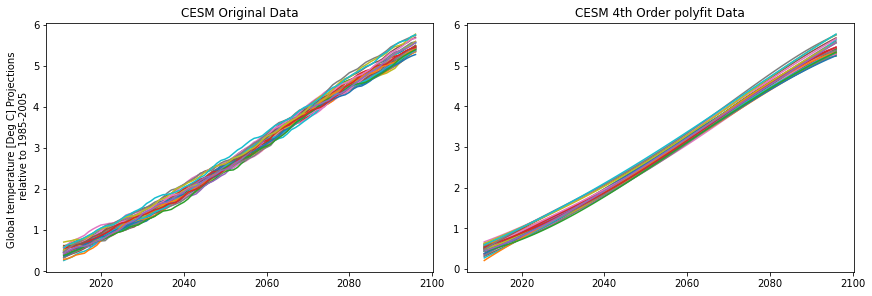

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True,figsize=(12,4))
for i in range(len(CESM_global.member_id)):
    ax[0].plot(CESM_global.time.dt.year,CESM_global.TREFHT.isel(member_id=i))
    ax[1].plot(CESM_global.time.dt.year,CESM_global.TREFHT_fit.isel(member_id=i))
ax[0].set_title('CESM Original Data')
ax[1].set_title('CESM 4th Order polyfit Data')
ax[0].set_ylabel('Global temperature [Deg C] Projections \n relative to 1985-2005')

#### CMIP6

Text(0, 0.5, 'Global temperature [Deg C] Projections \n relative to 1985-2005')

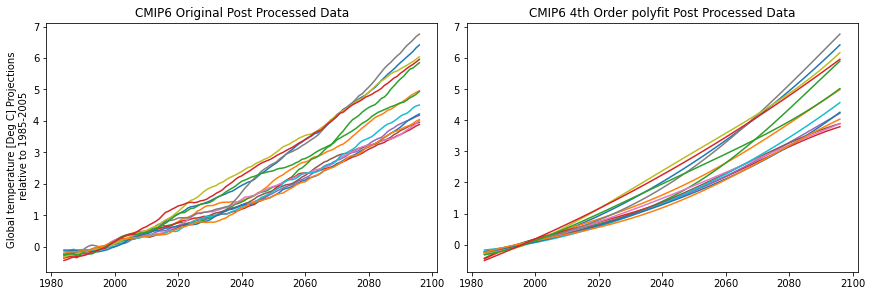

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True,figsize=(12,4))
for i in range(len(global_pp.model)):
    ax[0].plot(global_pp.time.dt.year,global_pp.t2m.isel(model=i))
    ax[1].plot(global_pp.time.dt.year,global_pp.t2m_fit.isel(model=i))
ax[0].set_title('CMIP6 Original Post Processed Data')
ax[1].set_title('CMIP6 4th Order polyfit Post Processed Data')
ax[0].set_ylabel('Global temperature [Deg C] Projections \n relative to 1985-2005')

Text(0, 0.5, 'Global temperature [Deg C] Projections \n relative to 1985-2005')

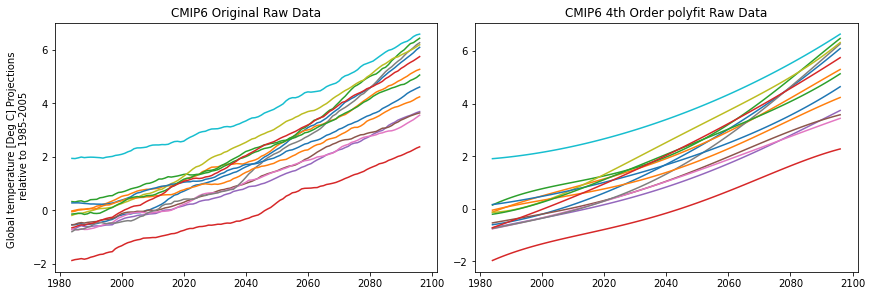

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True,figsize=(12,4))
for i in range(len(global_raw.model)):
    ax[0].plot(global_raw.time.dt.year,global_raw.t2m.isel(model=i))
    ax[1].plot(global_raw.time.dt.year,global_raw.t2m_fit.isel(model=i))
ax[0].set_title('CMIP6 Original Raw Data')
ax[1].set_title('CMIP6 4th Order polyfit Raw Data')
ax[0].set_ylabel('Global temperature [Deg C] Projections \n relative to 1985-2005')

Text(0, 0.5, 'Fractional Contribution \n to Total Uncertainty (%)')

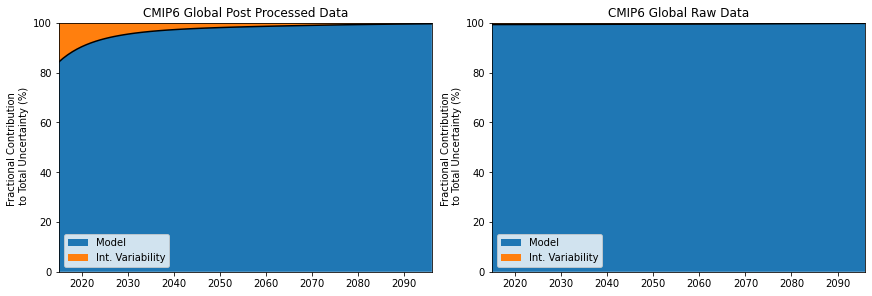

In [45]:
fig,ax = plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(12,4))


x =global_pp.time
y =global_pp.model_frac
ax[0].fill_between(x,y,label='Model')
ax[0].plot(global_pp.time,global_pp.model_frac,color='k')
ax[0].fill_between(x,y,100,label='Int. Variability')
ax[0].set_xlim(x[31],x[-1])
ax[0].set_ylim(0,100)
ax[0].legend(loc=3)
ax[0].set_title('CMIP6 Global Post Processed Data')
ax[0].set_ylabel('Fractional Contribution \n to Total Uncertainty (%)')

x =global_raw.time
y =global_raw.model_frac
ax[1].fill_between(x,y,label='Model')
ax[1].plot(global_raw.time,global_raw.model_frac,color='k')
ax[1].fill_between(x,y,100,label='Int. Variability')
ax[1].set_xlim(x[31],x[-1])
ax[1].set_ylim(0,100)
ax[1].legend(loc=3)
ax[1].set_title('CMIP6 Global Raw Data')
ax[1].set_ylabel('Fractional Contribution \n to Total Uncertainty (%)')


Text(0.5, 1.0, 'CMIP6 Post Processed and CESM Uncertainties')

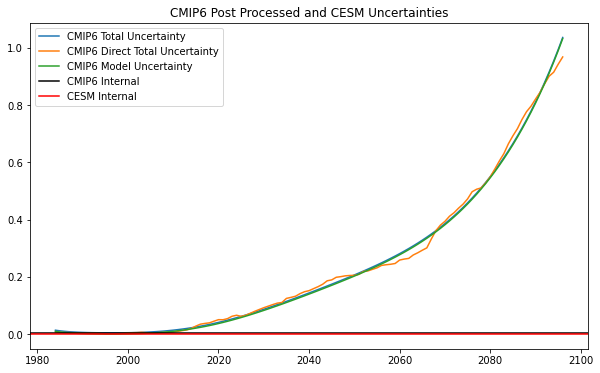

In [10]:
# total uncertainty 
fig = plt.figure(figsize=(10,6))
plt.plot(global_pp.time,global_pp.total,label='CMIP6 Total Uncertainty')
plt.plot(global_pp.time,global_pp.total_direct,label='CMIP6 Direct Total Uncertainty')
plt.plot(global_pp.time,global_pp.model_fit,label='CMIP6 Model Uncertainty')
plt.axhline(global_pp.internal_fit,label='CMIP6 Internal',color='k')
plt.axhline(CESM_global.internal_fit,label='CESM Internal',color='r')
plt.legend()
plt.title('CMIP6 Post Processed and CESM Uncertainties')

Text(0.5, 1.0, 'CMIP6 Raw and CESM Uncertainties')

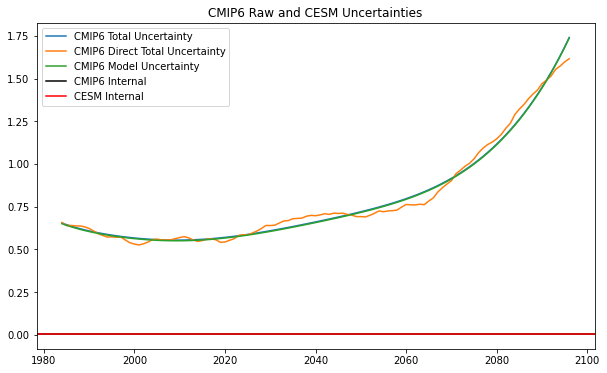

In [11]:
# total uncertainty 
fig = plt.figure(figsize=(10,6))
plt.plot(global_raw.time,global_raw.total,label='CMIP6 Total Uncertainty')
plt.plot(global_raw.time,global_raw.total_direct,label='CMIP6 Direct Total Uncertainty')
plt.plot(global_raw.time,global_raw.model_fit,label='CMIP6 Model Uncertainty')
plt.axhline(global_raw.internal_fit,label='CMIP6 Internal',color='k')
plt.axhline(CESM_global.internal_fit,label='CESM Internal',color='r')
plt.legend()
plt.title('CMIP6 Raw and CESM Uncertainties')

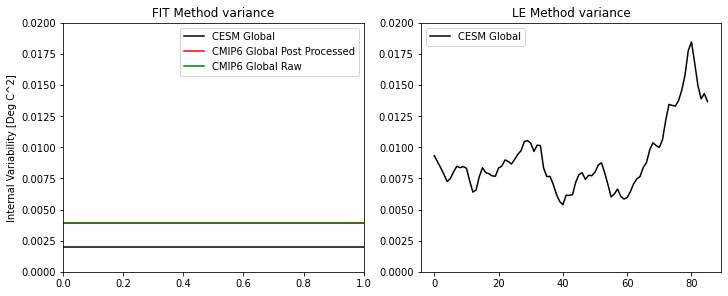

In [34]:
# plot internal variability from CESM FIT and LE method 
fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True,figsize=(10,4))

ax[0].axhline(CESM_global.internal_fit,color='k',label='CESM Global')
ax[0].axhline(global_pp.internal_fit,color='r',label='CMIP6 Global Post Processed')
ax[0].axhline(global_raw.internal_fit,color='g',label='CMIP6 Global Raw')
ax[0].set_ylim(0,0.02)
ax[0].legend()
ax[0].set_ylabel('Internal Variability [Deg C^2]')
ax[0].set_title('FIT Method variance')
ax[1].plot(CESM_global.internal_le,color='k',label='CESM Global')
ax[1].set_title('LE Method variance')
ax[1].set_ylim(0,0.02)
ax[1].legend()


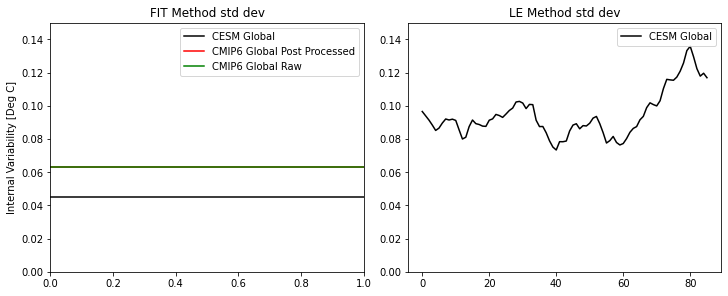

In [35]:
# plot internal variability from CESM FIT and LE method 
fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True,figsize=(10,4))

ax[0].axhline(np.sqrt(CESM_global.internal_fit),color='k',label='CESM Global')
ax[0].axhline(np.sqrt(global_pp.internal_fit),color='r',label='CMIP6 Global Post Processed')
ax[0].axhline(np.sqrt(global_raw.internal_fit),color='g',label='CMIP6 Global Raw')
ax[0].set_ylim(0,0.15)
ax[0].legend()
ax[0].set_ylabel('Internal Variability [Deg C]')
ax[0].set_title('FIT Method std dev')
ax[1].plot(np.sqrt(CESM_global.internal_le),color='k',label='CESM Global')
ax[1].set_title('LE Method std dev')
ax[1].set_ylim(0,0.15)
ax[1].legend()

### Local Data 

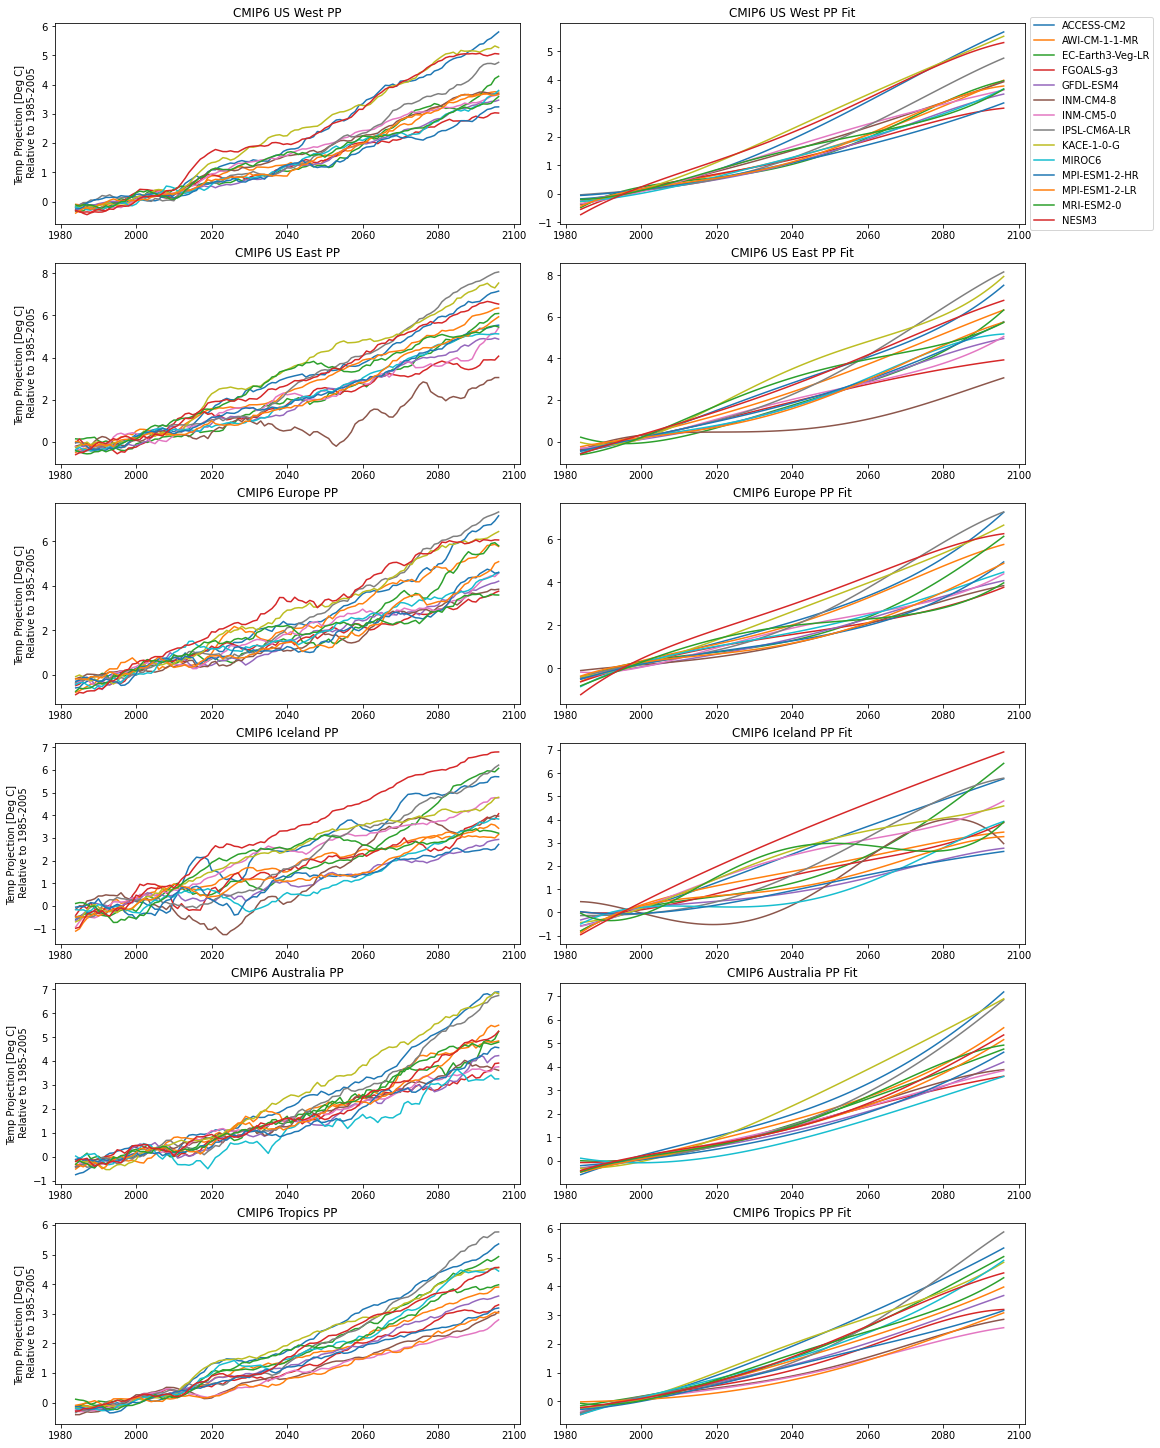

In [54]:
fig,ax = plt.subplots(nrows=6,ncols=2,constrained_layout=True,figsize=(16,20))

regions_pp = [USwest_pp,USeast_pp,europe_pp,iceland_pp,australia_pp,tropics_pp]
axes = np.arange(0,6,1)
titles = ['CMIP6 US West PP','CMIP6 US East PP','CMIP6 Europe PP','CMIP6 Iceland PP','CMIP6 Australia PP','CMIP6 Tropics PP']
for r,i,t in zip(regions_pp,axes,titles):
    for m in range(len(USwest_pp.model)):
        ax[i,0].plot(r.time,r.t2m.isel(model=m))
        ax[i,0].set_title(t)
        ax[i,0].set_ylabel('Temp Projection [Deg C] \n Relative to 1985-2005')

# regions_raw = [USwest_raw,USeast_raw,europe_raw,iceland_raw,australia_raw,tropics_raw]
axes = np.arange(0,6,1)
titles = ['CMIP6 US West PP Fit','CMIP6 US East PP Fit','CMIP6 Europe PP Fit','CMIP6 Iceland PP Fit',
          'CMIP6 Australia PP Fit','CMIP6 Tropics PP Fit']
for r,i,t in zip(regions_pp,axes,titles):
    for m in range(len(USwest_pp.model)):
        ax[i,1].plot(r.time,r.t2m_fit.isel(model=m),label=USwest_pp.model.values[m])
        ax[i,1].set_title(t)
        ax[i,1].set_title(t)
        ax[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

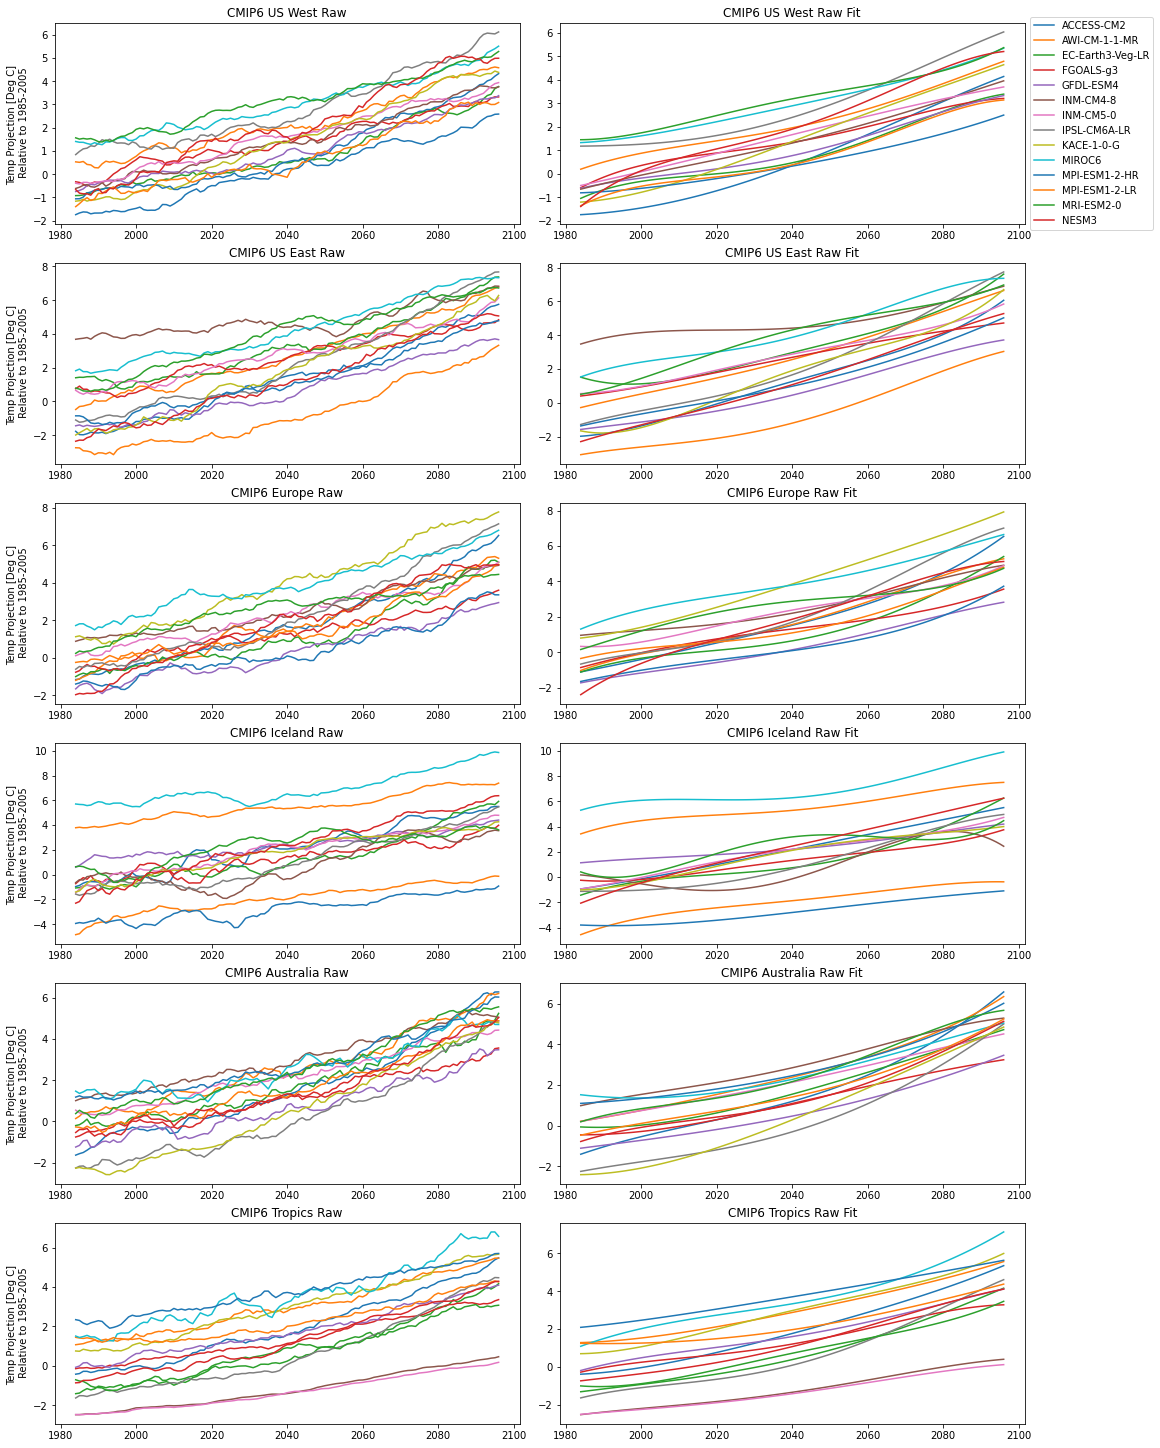

In [56]:
fig,ax = plt.subplots(nrows=6,ncols=2,constrained_layout=True,figsize=(16,20))

regions_raw = [USwest_raw,USeast_raw,europe_raw,iceland_raw,australia_raw,tropics_raw]
axes = np.arange(0,6,1)
titles = ['CMIP6 US West Raw','CMIP6 US East Raw','CMIP6 Europe Raw','CMIP6 Iceland Raw',
          'CMIP6 Australia Raw','CMIP6 Tropics Raw']
for r,i,t in zip(regions_raw,axes,titles):
    for m in range(len(USwest_pp.model)):
        ax[i,0].plot(r.time,r.t2m.isel(model=m))
        ax[i,0].set_title(t)
        ax[i,0].set_ylabel('Temp Projection [Deg C] \n Relative to 1985-2005')

axes = np.arange(0,6,1)
titles = ['CMIP6 US West Raw Fit','CMIP6 US East Raw Fit','CMIP6 Europe Raw Fit','CMIP6 Iceland Raw Fit',
          'CMIP6 Australia Raw Fit','CMIP6 Tropics Raw Fit']
for r,i,t in zip(regions_raw,axes,titles):
    for m in range(len(USwest_pp.model)):
        ax[i,1].plot(r.time,r.t2m_fit.isel(model=m),label=USwest_pp.model.values[m])
        ax[i,1].set_title(t)
        ax[i,1].set_title(t)
        ax[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

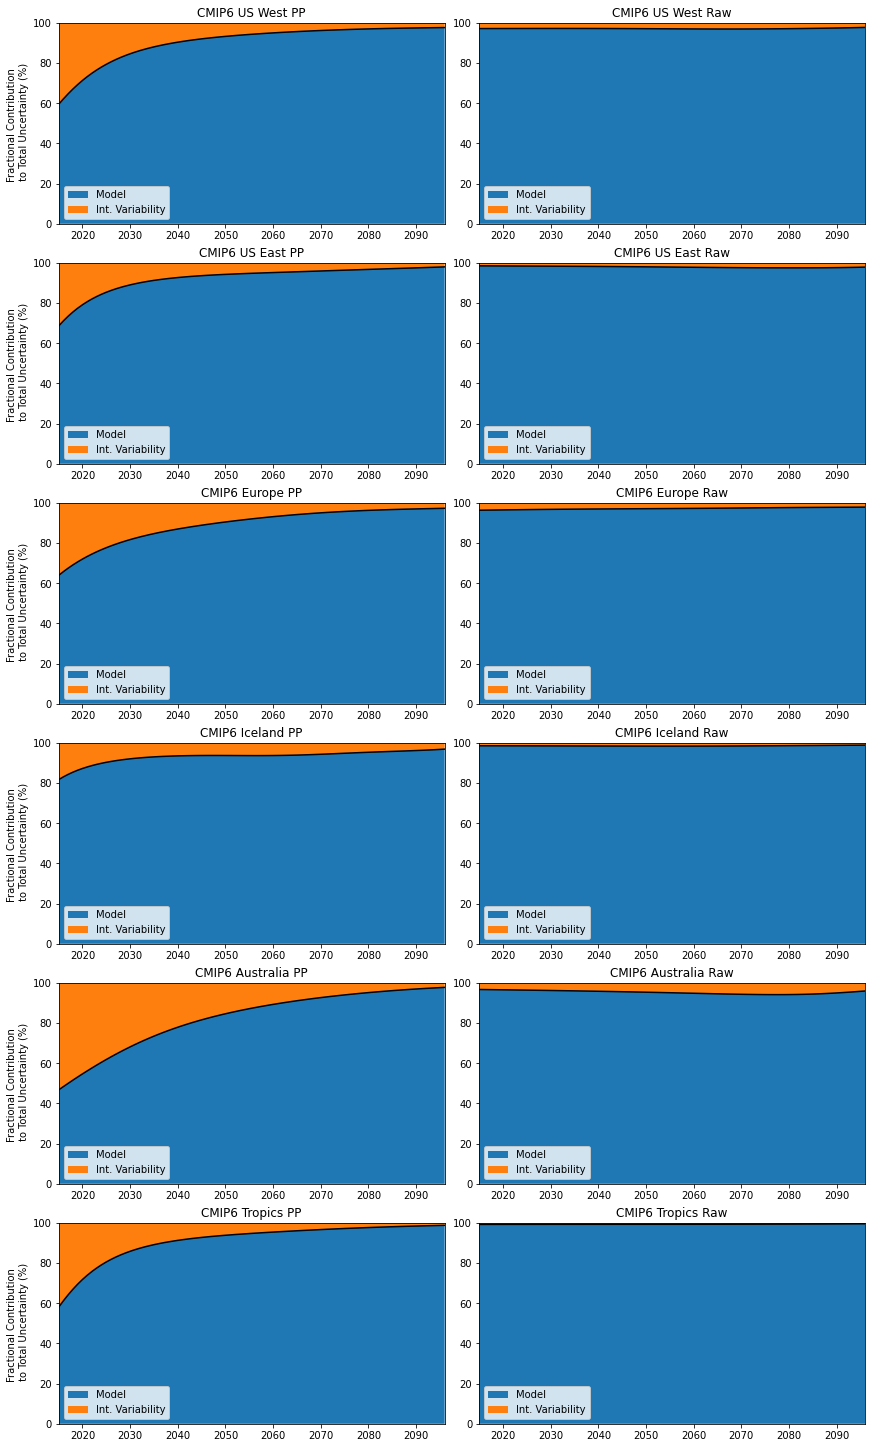

In [58]:
fig,ax = plt.subplots(nrows=6,ncols=2,constrained_layout=True,figsize=(12,20))

regions_pp = [USwest_pp,USeast_pp,europe_pp,iceland_pp,australia_pp,tropics_pp]
axes = np.arange(0,6,1)
titles = ['CMIP6 US West PP','CMIP6 US East PP','CMIP6 Europe PP','CMIP6 Iceland PP','CMIP6 Australia PP','CMIP6 Tropics PP']
for r,i,t in zip(regions_pp,axes,titles):
    x =r.time
    y =r.model_frac
    ax[i,0].fill_between(x,y,label='Model')
    ax[i,0].plot(r.time,r.model_frac,color='k')
    ax[i,0].fill_between(x,y,100,label='Int. Variability')
    ax[i,0].set_xlim(x[31],x[-1])
    ax[i,0].set_ylim(0,100)
    ax[i,0].legend(loc=3)
    ax[i,0].set_title(t)
    ax[i,0].set_ylabel('Fractional Contribution \n to Total Uncertainty (%)')

regions_raw = [USwest_raw,USeast_raw,europe_raw,iceland_raw,australia_raw,tropics_raw]
axes = np.arange(0,6,1)
titles = ['CMIP6 US West Raw','CMIP6 US East Raw','CMIP6 Europe Raw','CMIP6 Iceland Raw',
          'CMIP6 Australia Raw','CMIP6 Tropics Raw']
for r,i,t in zip(regions_raw,axes,titles):
    x = r.time
    y = r.model_frac
    ax[i,1].fill_between(x,y,label='Model')
    ax[i,1].plot(r.time,r.model_frac,color='k')
    ax[i,1].fill_between(x,y,100,label='Int. Variability')
    ax[i,1].set_xlim(x[31],x[-1])
    ax[i,1].set_ylim(0,100)
    ax[i,1].legend(loc=3)
    ax[i,1].set_title(t)

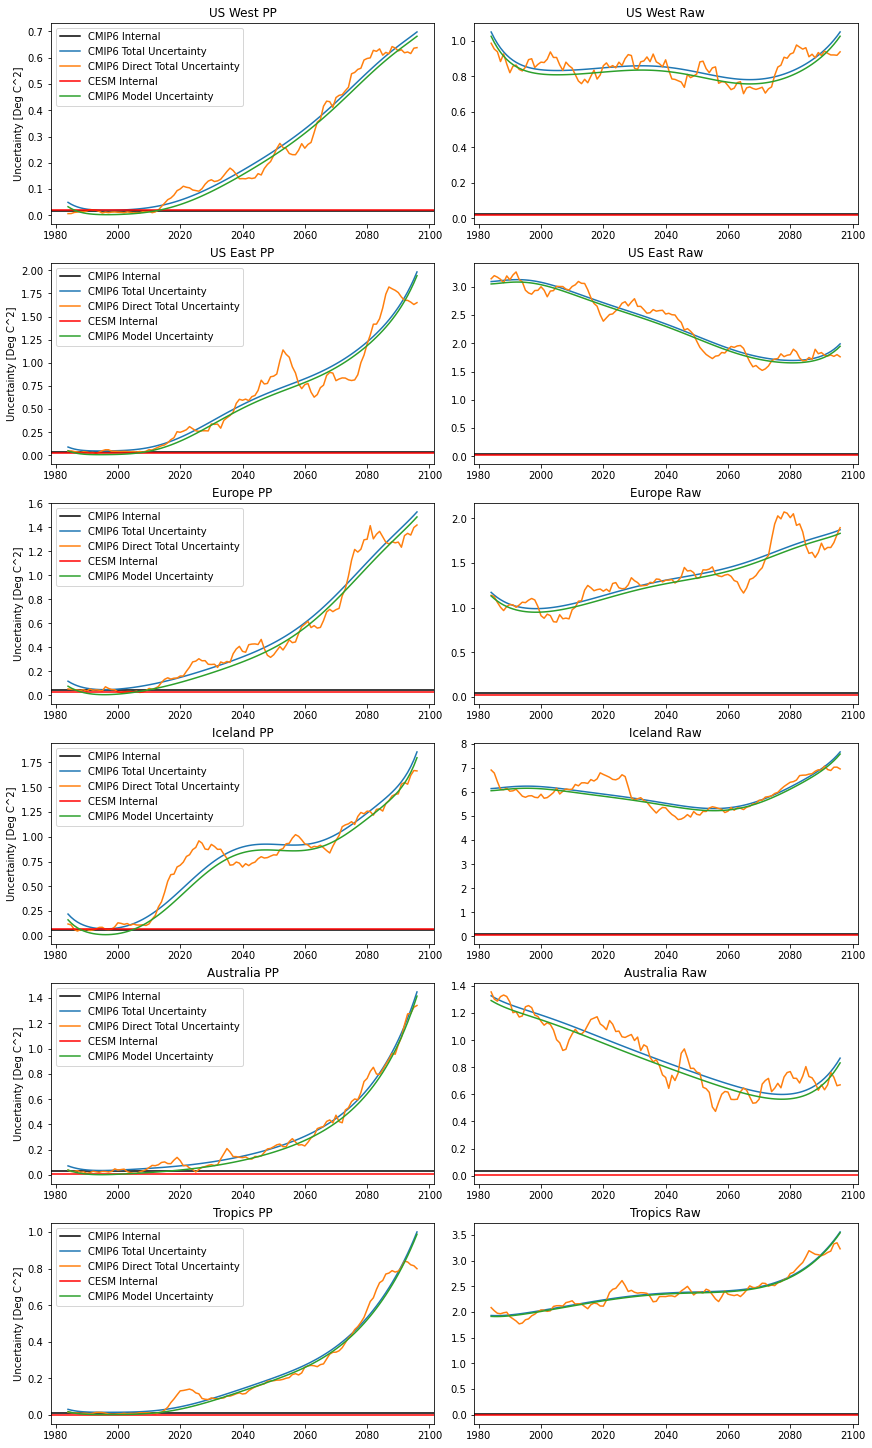

In [70]:
fig,ax = plt.subplots(nrows=6,ncols=2,constrained_layout=True,figsize=(12,20))

regions_pp = [USwest_pp,USeast_pp,europe_pp,iceland_pp,australia_pp,tropics_pp]
CESM_regions = [CESM_USwest, CESM_USeast, CESM_europe, CESM_iceland, CESM_australia, CESM_tropics]
axes = np.arange(0,6,1)
titles = ['US West PP','US East PP','Europe PP','Iceland PP','Australia PP','Tropics PP']
for r,i,t,c in zip(regions_pp,axes,titles,CESM_regions):
    ax[i,0].axhline(r.internal_fit,color='k',label='CMIP6 Internal')
    ax[i,0].plot(r.time,r.total,label='CMIP6 Total Uncertainty')
    ax[i,0].plot(r.time,r.total_direct,label='CMIP6 Direct Total Uncertainty')
    ax[i,0].axhline(c.internal_fit,color='r',label='CESM Internal')
    ax[i,0].plot(r.time,r.model_fit,label='CMIP6 Model Uncertainty')
    # ax[i,0].set_ylim(0,0.1)
    ax[i,0].set_title(t)
    ax[i,0].set_ylabel('Uncertainty [Deg C^2]')
    ax[i,0].legend()

regions_raw = [USwest_raw,USeast_raw,europe_raw,iceland_raw,australia_raw,tropics_raw]
axes = np.arange(0,6,1)
titles = ['US West Raw','US East Raw','Europe Raw','Iceland Raw','Australia Raw','Tropics Raw']
for r,i,t,c in zip(regions_raw,axes,titles,CESM_regions):
    ax[i,1].axhline(r.internal_fit,color='k',label='CMIP6 Internal')
    ax[i,1].plot(r.time,r.total,label='CMIP6 Total Uncertainty')
    ax[i,1].plot(r.time,r.total_direct,label='CMIP6 Direct Total Uncertainty')
    ax[i,1].axhline(c.internal_fit,color='r',label='CESM Internal')
    ax[i,1].plot(r.time,r.model_fit,label='CMIP6 Model Uncertainty')
    # ax[i,1].set_ylim(0,0.1)
    ax[i,1].set_title(t)
    # ax[i,1].legend()

#### a closer look at internal variability between CMIP6 and CESM

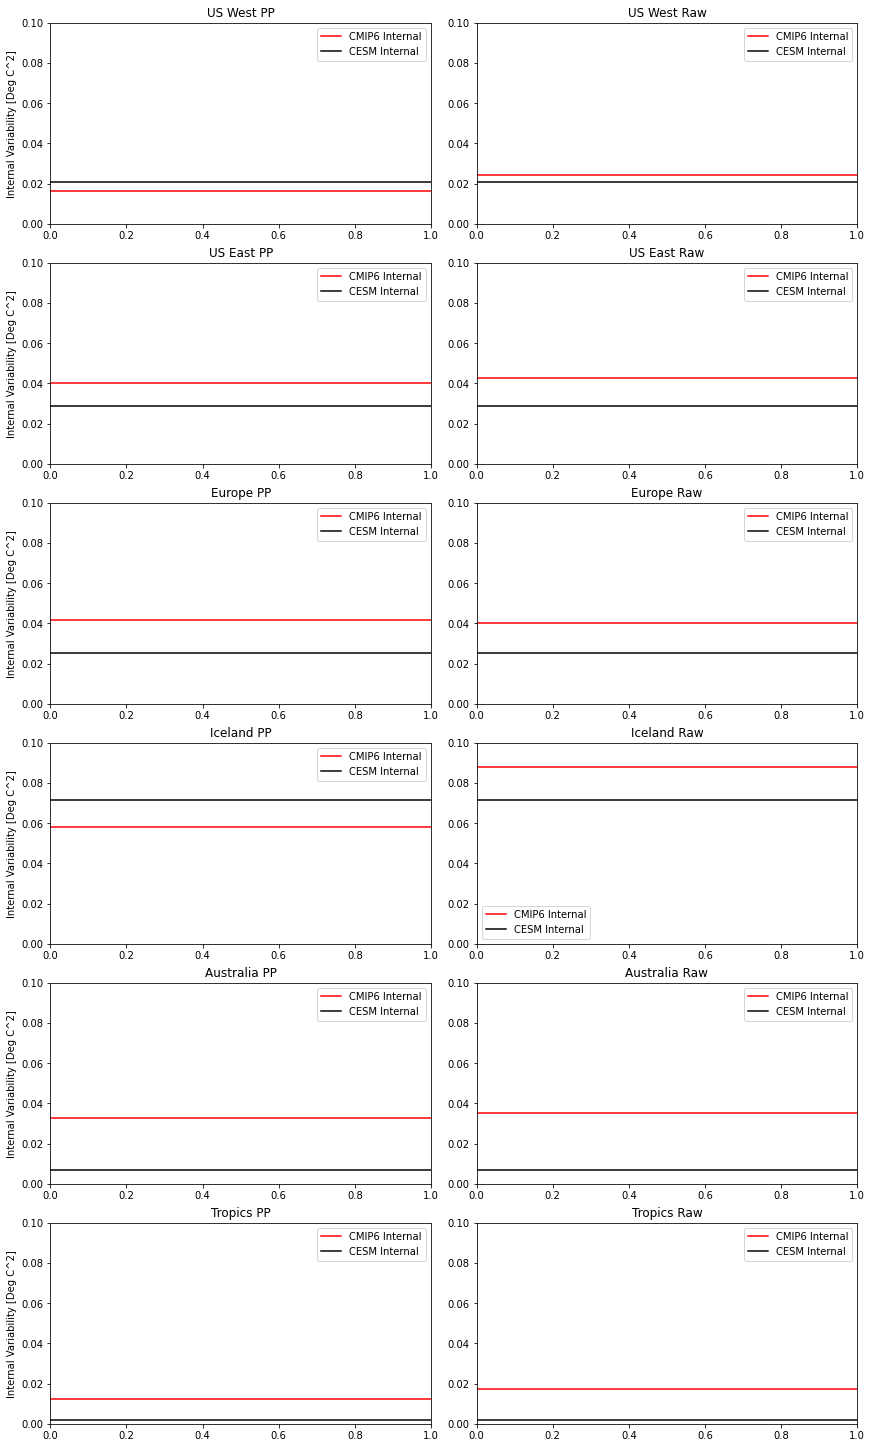

In [36]:
fig,ax = plt.subplots(nrows=6,ncols=2,constrained_layout=True,figsize=(12,20))

regions_pp = [USwest_pp,USeast_pp,europe_pp,iceland_pp,australia_pp,tropics_pp]
CESM_regions = [CESM_USwest, CESM_USeast, CESM_europe, CESM_iceland, CESM_australia, CESM_tropics]
axes = np.arange(0,6,1)
titles = ['US West PP','US East PP','Europe PP','Iceland PP','Australia PP','Tropics PP']
for r,i,t,c in zip(regions_pp,axes,titles,CESM_regions):
    ax[i,0].axhline(r.internal_fit,color='r',label='CMIP6 Internal')
    ax[i,0].axhline(c.internal_fit,color='k',label='CESM Internal')
    ax[i,0].set_ylim(0,0.1)
    ax[i,0].set_title(t)
    ax[i,0].set_ylabel('Internal Variability [Deg C^2]')
    ax[i,0].legend()

regions_raw = [USwest_raw,USeast_raw,europe_raw,iceland_raw,australia_raw,tropics_raw]
axes = np.arange(0,6,1)
titles = ['US West Raw','US East Raw','Europe Raw','Iceland Raw','Australia Raw','Tropics Raw']
for r,i,t,c in zip(regions_raw,axes,titles,CESM_regions):
    ax[i,1].axhline(r.internal_fit,color='r',label='CMIP6 Internal')
    ax[i,1].axhline(c.internal_fit,color='k',label='CESM Internal')
    ax[i,1].set_ylim(0,0.1)
    ax[i,1].set_title(t)
    ax[i,1].legend()

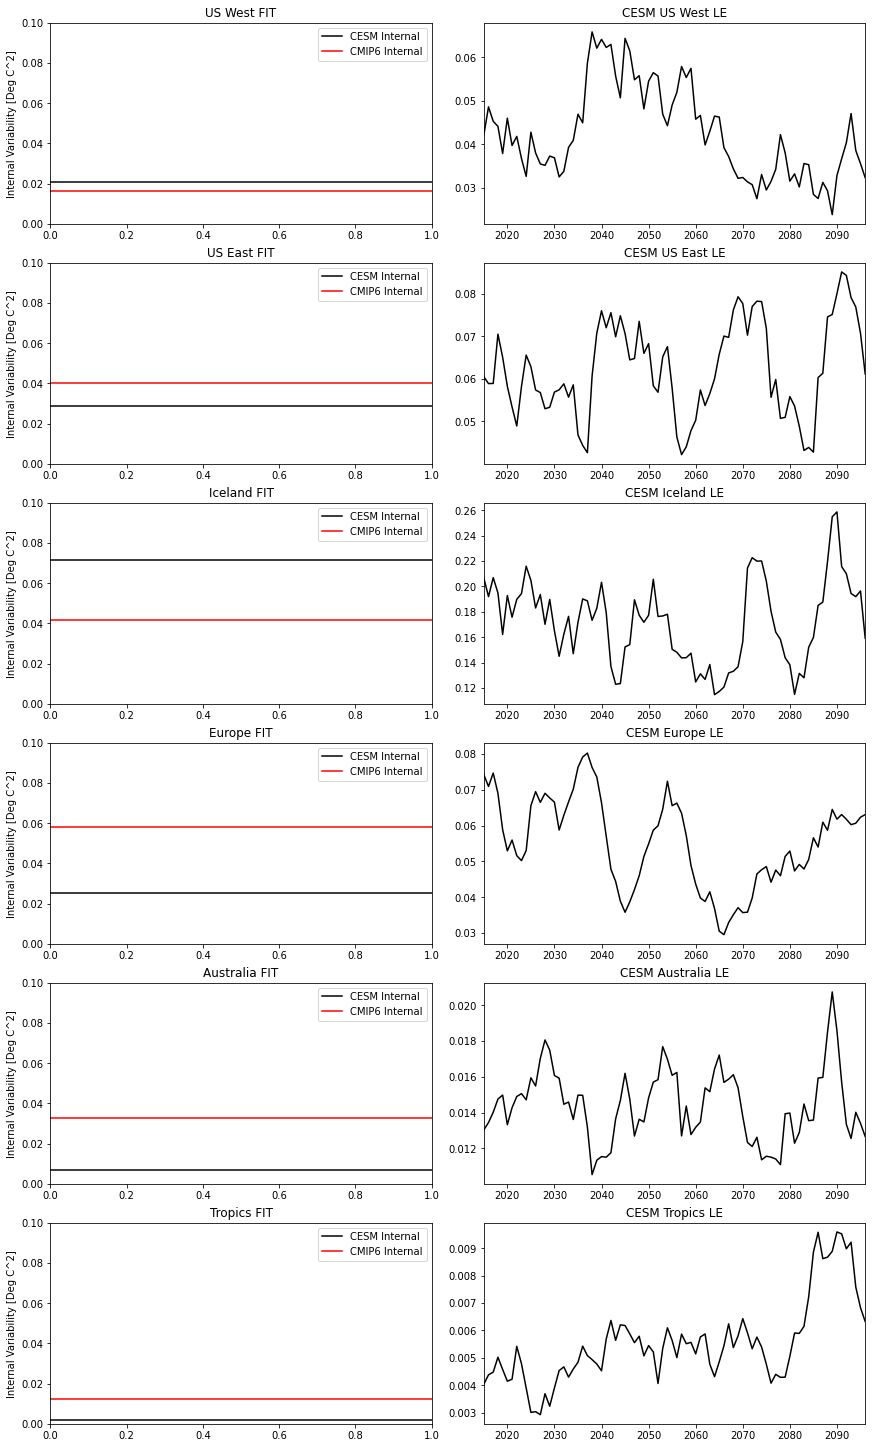

In [74]:
# plot internal variability from CESM FIT and LE method 
fig, ax = plt.subplots(nrows=6, ncols=2, constrained_layout=True,figsize=(12,20))

rows = np.arange(0,6,1)
regions = [CESM_USwest,CESM_USeast,CESM_iceland,CESM_europe,CESM_australia,CESM_tropics]
regions_pp = [USwest_pp,USeast_pp,europe_pp,iceland_pp,australia_pp,tropics_pp]
for i,region,r in zip(rows,regions,regions_pp):
    ax[i,0].axhline(region.internal_fit,color='k',label='CESM Internal') 
    ax[i,0].axhline(r.internal_fit,color='r',label='CMIP6 Internal')
    #ax[i,0].set_xlim(region.time.dt.year[4],region.time.dt.year[-1])
    ax[i,0].set_ylim(0,0.1)
    ax[i,0].set_ylabel('Internal Variability [Deg C^2]')
    ax[i,1].plot(region.time.dt.year,region.internal_le,color='k')
    ax[i,1].set_xlim(region.time.dt.year[4],region.time.dt.year[-1])
    ax[i,0].legend()
    
title_fit = ['US West FIT', 'US East FIT', 'Iceland FIT','Europe FIT','Australia FIT','Tropics FIT']
title_LE = ['CESM US West LE', 'CESM US East LE', 'CESM Iceland LE','CESM Europe LE','CESM Australia LE','CESM Tropics LE']

for i,j,k in zip(rows,title_fit,title_LE):
    ax[i,0].set_title(j)
    ax[i,1].set_title(k)

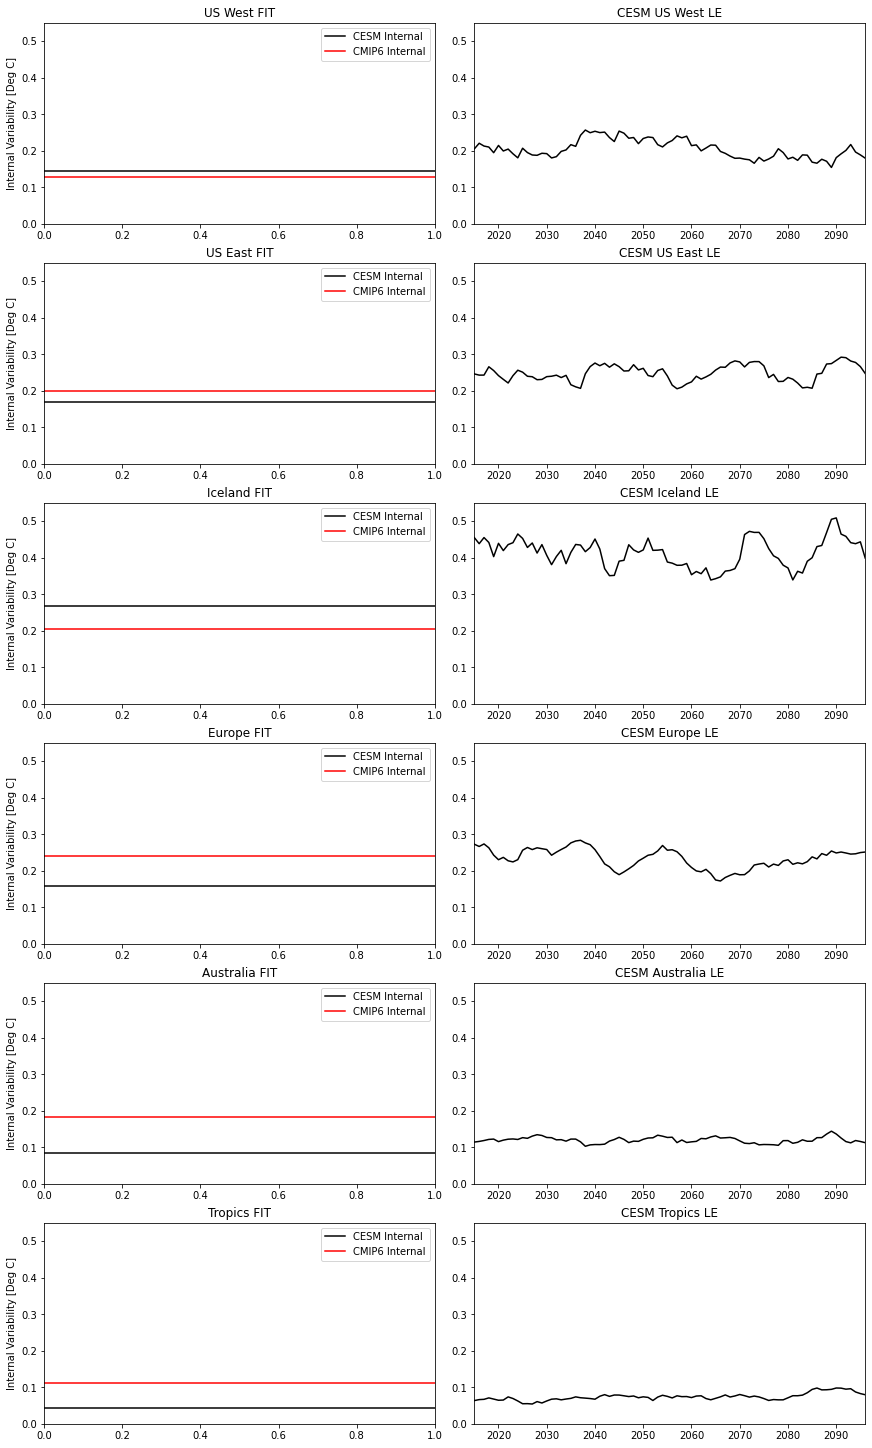

In [40]:
# plot internal variability from CESM FIT and LE method using std dev 
fig, ax = plt.subplots(nrows=6, ncols=2, constrained_layout=True,figsize=(12,20))

rows = np.arange(0,6,1)
regions = [CESM_USwest,CESM_USeast,CESM_iceland,CESM_europe,CESM_australia,CESM_tropics]
regions_pp = [USwest_pp,USeast_pp,europe_pp,iceland_pp,australia_pp,tropics_pp]
for i,region,r in zip(rows,regions,regions_pp):
    ax[i,0].axhline(np.sqrt(region.internal_fit),color='k',label='CESM Internal') 
    ax[i,0].axhline(np.sqrt(r.internal_fit),color='r',label='CMIP6 Internal')
    #ax[i,0].set_xlim(region.time.dt.year[4],region.time.dt.year[-1])
    ax[i,0].set_ylim(0,0.55)
    ax[i,0].set_ylabel('Internal Variability [Deg C]')
    ax[i,1].plot(region.time.dt.year,np.sqrt(region.internal_le),color='k')
    ax[i,1].set_ylim(0,0.55)
    ax[i,1].set_xlim(region.time.dt.year[4],region.time.dt.year[-1])
    ax[i,0].legend()
    
title_fit = ['US West FIT', 'US East FIT', 'Iceland FIT','Europe FIT','Australia FIT','Tropics FIT']
title_LE = ['CESM US West LE', 'CESM US East LE', 'CESM Iceland LE','CESM Europe LE','CESM Australia LE','CESM Tropics LE']

for i,j,k in zip(rows,title_fit,title_LE):
    ax[i,0].set_title(j)
    ax[i,1].set_title(k)